<a href="https://colab.research.google.com/github/jiwan-gharti-savi/pytorch/blob/main/basic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
a = torch.tensor(
    [[
        [
            [1,2,3],
            [1,2,3],
            [1,2,3]
        ],
        [
            [1,2,3],
            [1,2,3],
            [1,2,3]
        ]
    ],
     [
        [
            [1,2,3],
            [1,2,3],
            [1,2,3]
        ],
        [
            [1,2,3],
            [1,2,3],
            [1,2,3]
        ]
    ]]
    )

In [ ]:
a.ndim

4

In [ ]:
a.shape

torch.Size([2, 2, 3, 3])

In [ ]:
torch.max(a, dim=1)

torch.return_types.max(
values=tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]]]),
indices=tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]]))

In [ ]:
import torch
import torch as nn

import matplotlib.pyplot as plt

# version
print(torch.__version__)
print(nn.__version__)

#

2.3.0+cu121
2.3.0+cu121


In [ ]:
torch.rand(2,3)

tensor([[0.3153, 0.9650, 0.1308],
        [0.7612, 0.2182, 0.9481]])

In [ ]:
start = 0
end = 1
step = 0.02

weight = 0.7
bias = 0.3

x = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)


In [ ]:
x.shape


torch.Size([50, 1])

In [ ]:
x

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y = weight * x + bias



In [ ]:
len(x), len(y)

(50, 50)

In [ ]:
train_size = int(0.8 * len(x))

train_size

40

In [ ]:
X_train, y_train = x[:train_size], y[:train_size]
X_test, y_test = x[train_size:], y[train_size:]

In [ ]:
def plot_dataaset(
    X_train,
    y_train,
    X_test,
    y_test,
    prediction = None
):
    plt.figure(figsize=(10,7))

    plt.scatter(X_train, y_train, c='b', label='Training data')
    plt.scatter(X_test, y_test, c='g', label='Testing data')
    plt.scatter(X_test, prediction, c='r', label='Prediction')

    plt.legend(prop={"size": 14})




ValueError: x and y must be the same size

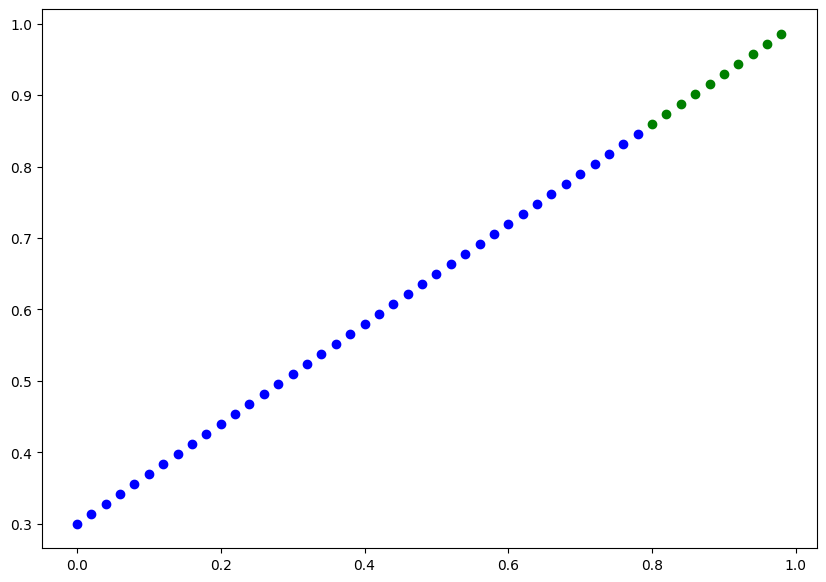

In [ ]:
plot_dataaset(X_train, y_train, X_test, y_test)

In [ ]:


import torch.nn as nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad = True)


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias



In [ ]:
model = LinearRegressionModel()

In [ ]:
model

LinearRegressionModel()

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([0.5992], requires_grad=True),
 Parameter containing:
 tensor([0.7123], requires_grad=True)]

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5992])), ('bias', tensor([0.7123]))])

In [ ]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[1.1916],
        [1.2036],
        [1.2156],
        [1.2276],
        [1.2396],
        [1.2516],
        [1.2635],
        [1.2755],
        [1.2875],
        [1.2995]])

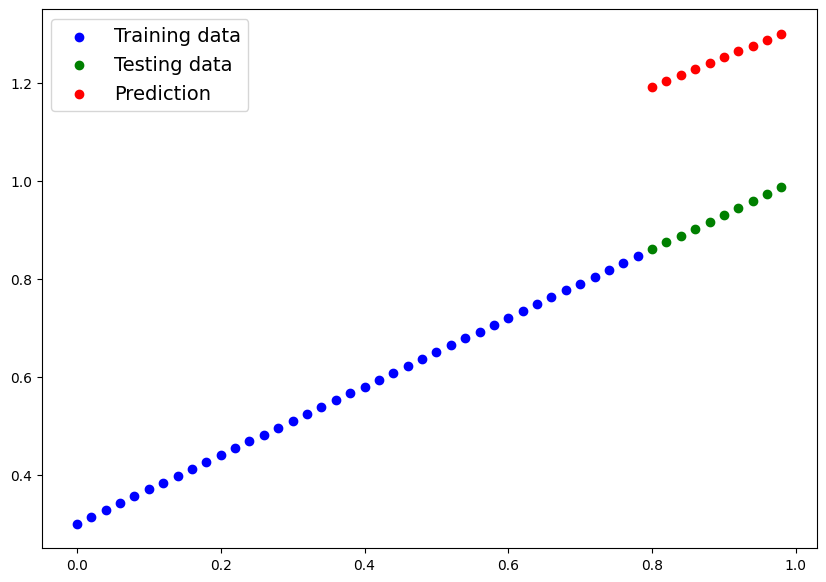

In [ ]:
plot_dataaset(X_train, y_train, X_test, y_test, prediction=y_preds)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [ ]:
loss_fn

L1Loss()

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
loss = nn.L1Loss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5)
output = loss(input, target)
output.backward()

In [ ]:
epochs = 100

epochs_count = []
training_loss = []
testing_loss = []

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model.eval()

  with torch.inference_mode():
    y_preds = model(X_test)

    test_loss = loss_fn(y_preds, y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    testing_loss.append(test_loss)
    training_loss.append(loss.detach().numpy())
    epochs_count.append(epoch)


    print(model.state_dict())

Epoch: 0 | Loss: 0.37298935651779175 | Test loss: 0.3090983033180237
OrderedDict([('weights', tensor([0.5953])), ('bias', tensor([0.7023]))])
Epoch: 10 | Loss: 0.25777941942214966 | Test loss: 0.17438840866088867
OrderedDict([('weights', tensor([0.5563])), ('bias', tensor([0.6023]))])
Epoch: 20 | Loss: 0.14256957173347473 | Test loss: 0.039678603410720825
OrderedDict([('weights', tensor([0.5173])), ('bias', tensor([0.5023]))])
Epoch: 30 | Loss: 0.05247887223958969 | Test loss: 0.06808268278837204
OrderedDict([('weights', tensor([0.4900])), ('bias', tensor([0.4188]))])
Epoch: 40 | Loss: 0.041840437799692154 | Test loss: 0.08882762491703033
OrderedDict([('weights', tensor([0.4976])), ('bias', tensor([0.3913]))])
Epoch: 50 | Loss: 0.03809453547000885 | Test loss: 0.08676384389400482
OrderedDict([('weights', tensor([0.5128])), ('bias', tensor([0.3798]))])
Epoch: 60 | Loss: 0.03461722284555435 | Test loss: 0.07986508309841156
OrderedDict([('weights', tensor([0.5296])), ('bias', tensor([0.37

In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.5962])), ('bias', tensor([0.3438]))])

In [ ]:
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[0.8208],
        [0.8327],
        [0.8446],
        [0.8566],
        [0.8685],
        [0.8804],
        [0.8923],
        [0.9042],
        [0.9162],
        [0.9281]])

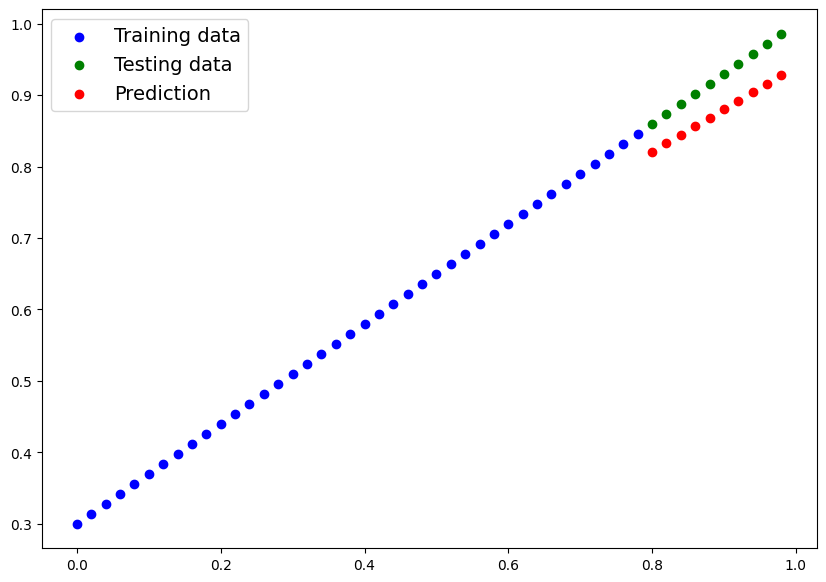

In [ ]:
plot_dataaset(X_train, y_train, X_test, y_test, prediction=y_preds)

In [ ]:
training_loss

[array(0.37298936, dtype=float32),
 array(0.25777942, dtype=float32),
 array(0.14256957, dtype=float32),
 array(0.05247887, dtype=float32),
 array(0.04184044, dtype=float32),
 array(0.03809454, dtype=float32),
 array(0.03461722, dtype=float32),
 array(0.03118783, dtype=float32),
 array(0.02775241, dtype=float32),
 array(0.02431433, dtype=float32)]

In [ ]:
testing_loss

[tensor(0.3091),
 tensor(0.1744),
 tensor(0.0397),
 tensor(0.0681),
 tensor(0.0888),
 tensor(0.0868),
 tensor(0.0799),
 tensor(0.0723),
 tensor(0.0640),
 tensor(0.0564)]

In [ ]:


def loss_vs_epoch_plot(epoch_count, training_loss, test_loss):
    # Detach the tensor from the computation graph and convert to numpy array

    # training_loss_np = np.array(training_loss.detach().numpy())
    # Plot training and test loss
    plt.plot(epoch_count, training_loss, label="Training loss")
    plt.plot(epoch_count, test_loss, label="Test loss")

    # Adding labels, title, and legend
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Test Loss vs. Epochs")
    plt.legend()

    # Display the plot
    plt.show()


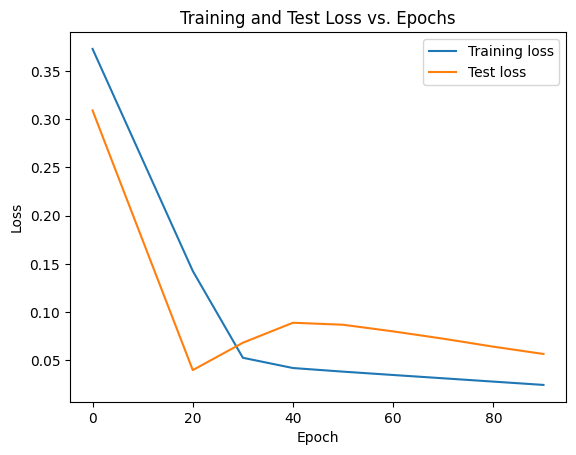

In [ ]:
loss_vs_epoch_plot(epoch_count=epochs_count, training_loss = training_loss, test_loss=testing_loss)

In [ ]:
from pathlib import Path

MODEL_DIR = Path('models')

MODEL_NAME = '01_regression_model.pt'

MODEL_PATH = MODEL_DIR / MODEL_NAME

MODEL_DIR.mkdir(parents=True, exist_ok=True)

MODEL_PATH

PosixPath('models/01_regression_model.pt')

In [ ]:
torch.save(obj=model.state_dict(), f=MODEL_PATH)

In [ ]:
!ls -la models/

total 12
drwxr-xr-x 2 root root 4096 Jun 22 14:17 .
drwxr-xr-x 1 root root 4096 Jun 22 14:17 ..
-rw-r--r-- 1 root root 1568 Jun 22 14:17 01_regression_model.pt


In [ ]:
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f=MODEL_PATH))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.5962])), ('bias', tensor([0.3438]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

In [ ]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
next(loaded_model.parameters())

Parameter containing:
tensor([0.5962], requires_grad=True)

In [ ]:
next(loaded_model.parameters()).device

device(type='cpu')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cuda'

In [ ]:
loaded_model.to(device)

LinearRegressionModel()

In [ ]:
next(loaded_model.parameters()).device

device(type='cuda', index=0)